In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
def inverse_yeo_johnson(x, lmbda):
    # Crea una máscara booleana para los valores positivos y negativos en x
    positive = x >= 0
    negative = ~positive

    # Inicializa un array vacío del mismo tamaño que x para almacenar los resultados
    result = np.empty_like(x)

    # Obtiene los índices de los valores positivos y negativos en x
    pos = np.where(positive)
    neg = np.where(negative)

    # Si lambda es 0, aplica la transformación inversa para los valores positivos en x
    if lmbda == 0:
        # La transformación inversa para lambda=0 y x>=0 es e^x - 1
        result[pos] = np.exp(x[pos]) - 1
    # Si lambda no es 0 pero es 2, aplica la transformación inversa para los valores negativos en x
    elif lmbda == 2:
        # La transformación inversa para lambda=2 y x<0 es 1 - e^-x
        result[neg] = 1 - np.exp(-x[neg])
    # Si lambda no es ni 0 ni 2, aplica la transformación inversa correspondiente para los valores positivos y negativos en x
    else:
        # La transformación inversa para lambda!=0 y x>=0 es ((lambda*x + 1)^(1/lambda)) - 1
        result[pos] = (lmbda * x[pos] + 1) ** (1 / lmbda) - 1
        # La transformación inversa para lambda!=2 y x<0 es -(((-2*lambda*x + 1)^(1/(2-lambda))) - 1)
        result[neg] = -((-2 * lmbda * x[neg] + 1) ** (1 / (2 - lmbda)) - 1)

    # Devuelve el array resultante con los valores transformados
    return result

C:\Users\maria\AppData\Local\Temp\ipykernel_10172\1192155062.py:24: RuntimeWarning: invalid value encountered in power
  result[pos] = (lmbda * x[pos] + 1) ** (1 / lmbda) - 1
C:\Users\maria\AppData\Local\Temp\ipykernel_10172\1192155062.py:26: RuntimeWarning: invalid value encountered in power
  result[neg] = -((-2 * lmbda * x[neg] + 1) ** (1 / (2 - lmbda)) - 1)


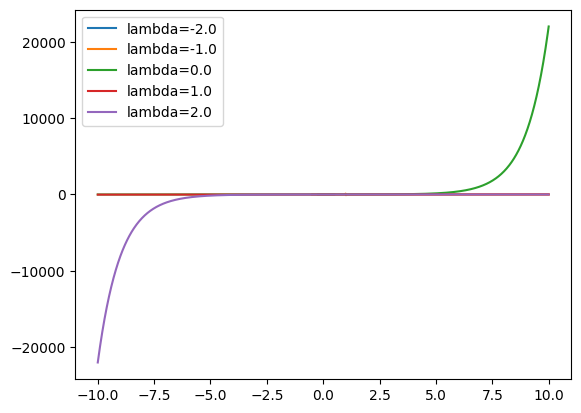

In [5]:
# Definir el rango de x(lambda)
x_lambda = np.linspace(-10, 10, 1000)

# Definir los valores de lambda
lambdas = np.linspace(-2, 2, 5)

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar la familia de curvas
for lmbda in lambdas:
    x = inverse_yeo_johnson(x_lambda, lmbda)
    ax.plot(x_lambda, x, label=f'lambda={lmbda}')

# Añadir la leyenda
ax.legend()

# Mostrar la gráfica
plt.show()